In [33]:
!pip install -U scikit-learn==1.2.0

     ---------------------------------------- 8.2/8.2 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
citylearn 2.0b9 requires scikit-learn==1.0.2, but you have scikit-learn 1.2.0 which is incompatible.


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [35]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [36]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [39]:
kf = KFold(n_splits=5)

In [40]:
from sklearn.model_selection import LearningCurveDisplay

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [21]:
f1_score_mlp = []





for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i+1}:")

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp = MLPClassifier(random_state=1, max_iter=5000,solver="sgd",learning_rate="adaptive")
    LearningCurveDisplay.from_estimator(mlp,X_train_cv,y_train_cv)


Fold 1:


NameError: name 'LearningCurveDisplay' is not defined

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330614
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330614 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726028
Var: 0.004579219539673834
0.08426840630693411 >= 0.07968918676726028 + 0.004579219539673834 = 0.08426840630693411
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548982
Var: 0.0032153180657605107
0.10398646080125035 >= 0.10077114273548982 + 0.0032153180657605107 = 0.10398646080125033
Polynomial degree: 3
Error: 0.06547790180152355
Bias^2: 0.06208238634231951
Var: 0.003395515459204093
0.06547790180152355 >= 0.06208238634231951 + 0.003395515459204093 = 0.0654779018015236
Polynomial degree: 4
Error: 0.0684451941400944
Bias^2: 0.06453579006728319
Var: 0.00390940407281122
0.0684451941400944 >= 0.06453579006728319 + 0.00390940407281122 = 0.06844519414009441
Polynomial degree: 5
Error: 0.052279218012057094
Bias^2: 0

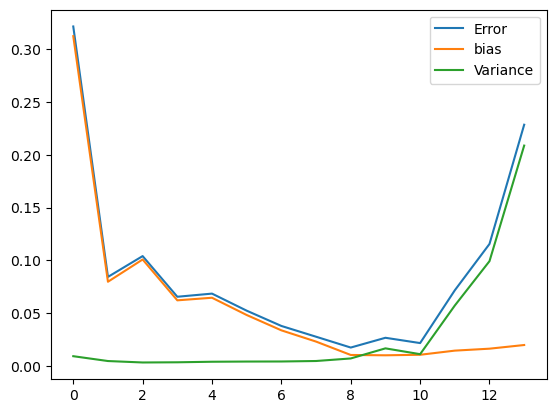

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

In [2]:
y_pred

array([[ 0.33990323,  0.33850277,  0.32637235,  1.14801224,  0.34067963,
         0.29876217,  0.38567493,  0.35638973,  0.36398702,  0.38974435,
         0.40263501,  0.30674614,  0.5190629 ,  0.38898818,  0.44744459,
         0.51678728,  0.38603086,  0.3500944 ,  0.55666048,  0.34737829,
         0.37546642,  0.37660179,  0.05287941,  0.32455595,  0.48963183,
         0.44143413,  0.250238  ,  0.7065659 ,  0.4363306 ,  0.35957485,
         0.39680228,  0.34471018,  0.41712785,  0.27582746,  0.34927051,
         0.56601596, -5.08147891,  0.36435133,  0.44289543,  0.62836069,
         0.40107138,  0.29142629,  0.37157763,  0.46794049,  0.40643969,
         0.2947504 ,  0.46629633,  0.33215333,  0.3050362 ,  0.37642673,
         0.33582001,  0.3560491 ,  0.3752254 ,  0.37630672,  0.48751392,
         0.37461916,  0.39437217,  0.46923137,  0.46561395,  0.34116355,
         0.5576863 ,  0.40575615,  0.33164772,  0.2427046 ,  0.23653568,
         0.43817022,  0.36324417,  0.4207651 ,  0.3


Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes

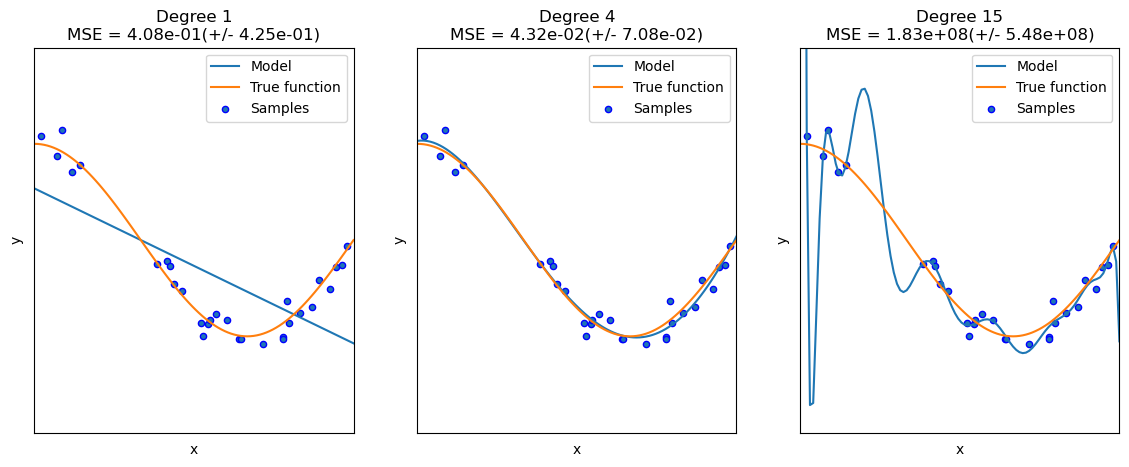

In [2]:
"""
============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()